# Predictive Modeling for Breast Tumor Diagnosis

Anna Ayres

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Dataset Preprocessing/Exploration

In [2]:
#Read cancer.csv into dataframe
df = pd.read_csv('cancer.csv')
#Data set provided in folder, contains breast tumor data.

In [3]:
#Display example row
df[:1]

,out,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [4]:
#Display Total in dataset
print(f"Total patients in the dataset: {df.shape[0]} ")

Total patients in the dataset: 569 


In [5]:
#Replace the labels in column out with 0 for B benign and 1 for M (malignant).
df['out'] = df['out'].replace({'B': 0, 'M': 1})

#Find total proportion of patients with  M tumor cancer in dataset
proportion_cancer = df.out.value_counts()[1]/df.shape[0]
print(f"Proportion of patients with malignant tumors: {proportion_cancer}")

#Seperate data into X, y
X = df.drop('out', axis=1)
y = df['out']

Proportion of patients with malignant tumors: 0.37258347978910367


## Model Building

In [6]:
#Use train_test_split() with test_size = 0.3 and random_state=42
#to split the data into train and test (stratified) sets.

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.3,
                                                    random_state=42)

#Display Test and train set totals   
print(f"TEST SET\nCancer Patients: {sum(y_test == 1)}\n\
Non-cancer Patients: {sum(y_test == 0)}\n\
Total: {len(y_test)}") 
   
print(f"\nTRAIN SET\nCancer Patients: {sum(y_train == 1)}\n\
Non-cancer Patients: {sum(y_train == 0)}\n\
Total: {len(y_train)}") 

TEST SET
Cancer Patients: 64
Non-cancer Patients: 107
Total: 171

TRAIN SET
Cancer Patients: 148
Non-cancer Patients: 250
Total: 398


  ##         - KNN Model

In [7]:
#Use the train set to build a KNN model.
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

probabs = knn.predict_proba(X_test)
    # select last column (category 1)
probabs = knn.predict_proba(X_test)[:,1]

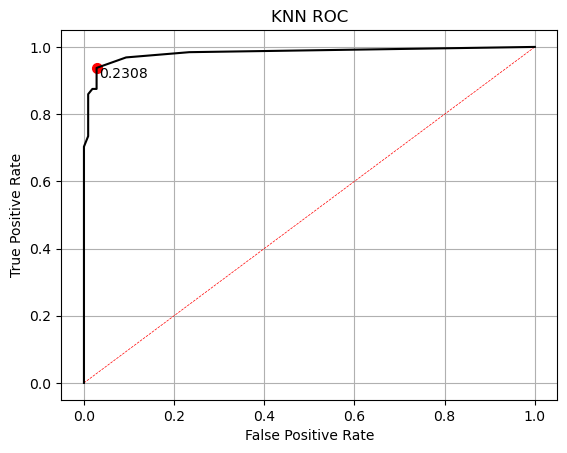

In [8]:
# Plot ROC for KNN

fpr,tpr,thresholds = roc_curve(y_test,probabs)

#Use np.argmax(tpr-fpr) to find the best threshold.
idx = np.argmax(tpr-fpr)

#Show KNN best threshold (red dot)
value = thresholds[idx].round(4)
plt.plot(fpr[idx], tpr[idx], 'ro',ms=7)
plt.annotate(value,(1.2*fpr[idx], 
                    0.97*tpr[idx])
            )

# plot 45-degree line
xaxis = yaxis = [0,1]
plt.plot(xaxis,yaxis,'r--',linewidth=0.5)

# display KNN ROC curve
plt.plot(fpr,tpr,'k')
plt.title('KNN ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

## - Logistic Regression Model

In [9]:
#Use the train set to build a logistic regression model. 
logistic_regression = LogisticRegression(max_iter=10000)
logistic_regression.fit(X_train, y_train)

probabs2 = logistic_regression.predict_proba(X_test)
    # Select last column (category 1)
probabs2 = logistic_regression.predict_proba(X_test)[:,1]

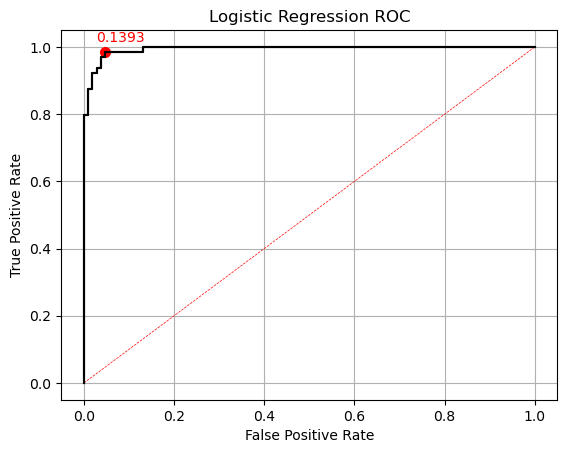

In [10]:
#Plot the ROC curve for LogReg

fpr2,tpr2,thresholds2 = roc_curve(y_test,probabs2)

#Use np.argmax(tpr2-fpr2) to find the best threshold
idx2 = np.argmax(tpr2-fpr2)

#Show LogReg best threshold (red dot)
value2 = thresholds2[idx2].round(4)
plt.plot(fpr2[idx2], tpr2[idx2], 'ro',ms=7)
plt.annotate(value2,
             (0.6*fpr2[idx2], 1.03*tpr2[idx2]), 
             color = 'r')
plt.plot(fpr2,tpr2,'k')

#Plot 45-degree line
xaxis = yaxis = [0,1]
plt.plot(xaxis,yaxis,'r--',linewidth=0.5)

#Display Logistic Regression ROC curve
plt.plot(fpr2,tpr2,'k')
plt.title('Logistic Regression ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

## Results Interpretation

### Area Under Curve (AUC) Analysis
####  The Area Under the Receiver Operating Characteristic (ROC) Curve (AUC) is used to evaluate the performance of both  classification models. This study calculates the AUC for both the K-Nearest Neighbors (KNN) and Logistic Regression models.

In [11]:
# Area Under Curve (AUC) for KNN
auc1 = roc_auc_score(y_test,probabs)

# AUC for Logistic Regression
auc2 = roc_auc_score(y_test,probabs2)

print("AUC Analysis")
print(f"\nKNN AUC: {auc1}")
print(f"Logistc Regression AUC: {auc2}\n")

if auc1 > auc2:
    print(f"The KNN model yields superior results.")
elif auc2 > auc1:
    print(f"The Logistc Regression model yields superior results.")
else:
    print(f"The is no difference in AUC scores.")

AUC Analysis

KNN AUC: 0.9826226635514018
Logistc Regression AUC: 0.9940128504672897

The Logistc Regression model yields superior results.


### Best Threshold Analysis
#### Optimal threshold for classification models is used to achieve the balance between sensitivity and specificity. This study calculates the best threshold values for both the K-Nearest Neighbors (KNN) and Logistic Regression models.

Best Threshold Analysis

Logistic Regression model best threshold is closest to
(fpr=0, tpr=1) at a distance of 0.04927207571924516 

KNN Distance: 0.06850069237201833


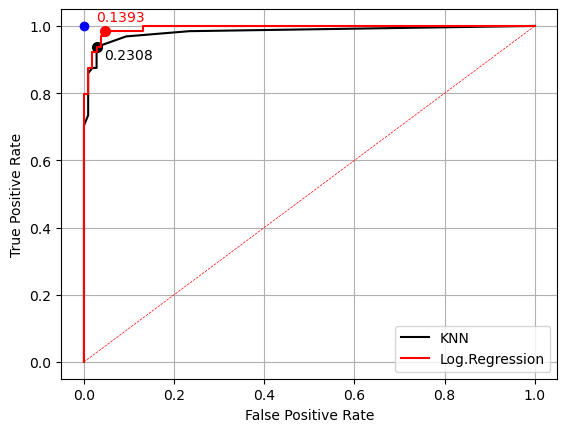

In [12]:
#Display both ROC Curves on the same plot identifying their
#best threshold values (black for KNN and red for logistic regression). 

# KNN
plt.plot(fpr[idx], tpr[idx], 'ko',ms=7)
plt.annotate(value,(1.6*fpr[idx], 0.96*tpr[idx]))
plt.plot(fpr,tpr,'k',label = 'KNN')

# Logistic Regression
value2 = thresholds2[idx2].round(4)
plt.plot(fpr2[idx2], tpr2[idx2], 'ro',ms=7)
plt.annotate(value2,
             (0.6*fpr2[idx2], 1.03*tpr2[idx2]), 
             color = 'r')
plt.plot(fpr2,tpr2,'r',label = 'Log.Regression')


#Plot 45-degree line
xaxis = yaxis = [0,1]
plt.plot(xaxis,yaxis,'r--',linewidth=0.5)

#Plot blue dot for (fpr=0, tpr=1)
plt.plot(0,1,'bo')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid()

#Find best threshold closest to coordinate (fpr=0, tpr=1)
distance_knn = np.sqrt((fpr[idx])**2 + (1 - tpr[idx])**2)
distance_logreg = np.sqrt((fpr2[idx2])**2 + (1 - tpr2[idx2])**2)

#Display results
print("Best Threshold Analysis\n")
if distance_knn < distance_logreg:
    print(f"KNN model best threshold is closest to\n(fpr=0, tpr=1)\
at a distance of {distance_knn}.\n\nLogistic Regression Distance: {distance_logreg}")
elif distance_logreg < distance_knn:
    print(f"Logistic Regression model best threshold is closest to\n\
(fpr=0, tpr=1) at a distance of {distance_logreg} \n\nKNN Distance: {distance_knn}")
else:
    print(f"Both model best thresholds are equidistant to coordinates\
(fpr=0, tpr=1).\nKNN Distance: {distance_knn}\n\
Logistic Regression Distance: {distance_logreg}")

### True Positive Rate (TPR) Analysis
#### The True Positive Rate (TPR), or true sensitivity, measures proportion of actual positive instances that are correctly identified by the classification models. This study calculates the TPR values for both the K-Nearest Neighbors (KNN) and Logistic Regression models.

In [13]:
#Display best TPR
print("TPR Analysis\n")

if tpr[idx] >  tpr2[idx2]:
    print("KNN Model yields superior TPR")
elif tpr[idx] <  tpr2[idx2]:
    print("Logistic Regression Model yields superior TPR\n")
else:
    print("Both models TPR are equal\nKNN: {tpr[idx]}\nLogistic Regression: {tpr2[idx2]}")
    
print(f"KNN model positive accuracy rate: {tpr[idx]}")
print(f"Logistic Regression model positive accuracy rate: {tpr2[idx2]}")


TPR Analysis

Logistic Regression Model yields superior TPR

KNN model positive accuracy rate: 0.9375
Logistic Regression model positive accuracy rate: 0.984375


## Conclusion
####  The findings from the AUC, best threshold, and TPR analyses demonstrate that the Logistic Regression model outperforms the KNN model across all evaluated metrics within the variables defined in this study.